## Esame di Metodi Numerici 6 Maggio 2024 

## Esercizo 1
- Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``'test_14_09_2023.mat'``.  Risolvere il sistema confrontando almeno due tra i metodi  visti  per utilizzare per risolvere il sistema lineare con tale matrice dei coefficienti. Confrontare i risultati dei vari metodi, e giustificare i loro comportamento utilizzando i risultati teorici visti a lezione.
- 
Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('test_06_05_2024.mat')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``


                                       [10 punti]
                                         


In [6]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
dati = loadmat('test_06_05_2024.mat')
A=dati['A']
A=A.astype(float)
b=dati['b']
b=b.astype(float)

In [24]:
import SolveTriangular as st
def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    M=D+E
    N=-F
    T=np.dot(np.linalg.inv(M),N)
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it<it_max and errore>=toll:
        temp=b-F@x0
        x , flag = st.Lsolve(M,temp)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

In [26]:
def steepestdescent(A,b,x0,itmax,tol):
 
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0

     
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while it<itmax and errore>=tol:
        it=it+1
        Ap= A@p
       
        alpha = -(r.T@p)/(p.T@Ap)
                
        x = x + alpha*p
        
         
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p =-r
        
     
    return x,vet_r,vec_sol,it

m= 400 n= 400
nZero= 1992
perc= 1.2449999999999999


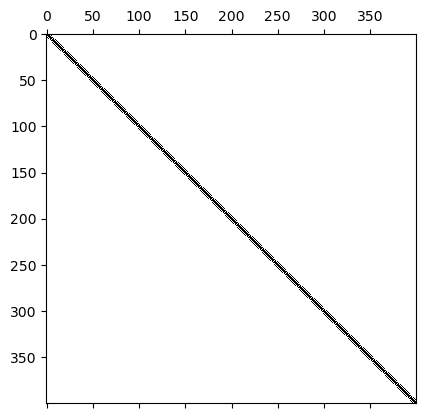

è simmetrica
è definita positiva
raggio spettrale Gauss-Seidel  0.797672650068991


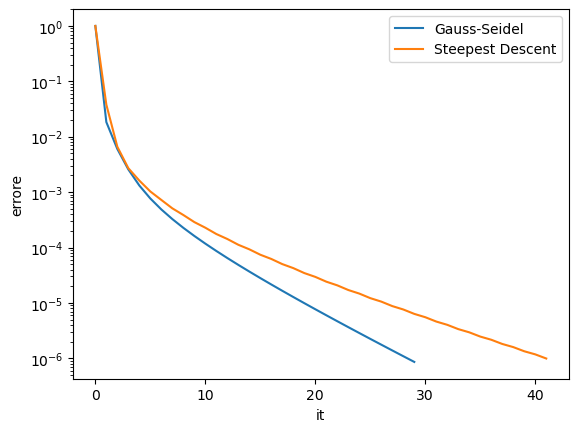

In [34]:
m,nb=A.shape
print("m=",m,"n=",nb)
nZero=np.count_nonzero(A)
print("nZero=",nZero)
perc=(nZero/(m*nb))*100 # cerco di capire se è sparsa oppure no
print("perc=",perc)

plt.spy(A) # mette in grafico la matrice => in banco i valori nulli , in nero quelli non nulli
plt.show()

flag=A==A.T # controllo se è simmetrica

x0=np.zeros(A.shape[0]).reshape(m,1)

if np.all(flag):
    print("è simmetrica")
    autovalori,autovettori=np.linalg.eig(A)
    flag_defPos=autovalori>0
    if np.all(flag_defPos):
        print("è definita positiva")
        solgs,itgs,err_vet_gs=gauss_seidel(A,b,x0,1.e-6,100)
        plt.semilogy(np.arange(itgs),err_vet_gs)
        x,vet_r,vet_sol,it=steepestdescent(A,b,x0,100,1.e-6)
        plt.semilogy(np.arange(it+1),vet_r)
        plt.xlabel("it")
        plt.ylabel("errore")
        plt.legend(["Gauss-Seidel","Steepest Descent"])
        plt.show()
    else:
        print("non è definita positiva")
else:
    print("non è simmetrica")


- Data la matrice 
$$A=\left[
\begin{array}{cccc}
1 & 2 & 3 & 4\\
2 & -4 & 6 & 8\\
-1 & -2 & -3 & -1\\
5 & 7 & 0 & 1
\end{array}
\right ],$$
Richiamare le ipotesi sotto cui esiste la fattorizzazione di Gauss senza pivoting e scrivere un codice per  verificarle.

                                                [2 punti]

## Esercizio 2
Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange, $n=5,10,15,18$

- nodi $x_i$, punti equidistanti in un intervallo $[a, b]$,
- nodi $x_i$, zeri dei polinomi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ della funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. 
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).
  
                                          [6] punti

- Calcolare l'errore di interpolazione $r(x) =  f(x)-pe(x) $,
tra la funzione test $f(x)$ e il polinomio di interpolazione $pe(x)$ calcolato a partire da nodi equdisitanti.
                                        [1] punto
                                        
Visualizzare il grafico di $f(x)$ e $pe(x)$, ed il grafico di $|r(x)|$ per ogni valore $n=5,10,15,18$ 

                                        [1] punto
                                        
Calcolare l'errore di interpolazione $r(x) =  f(x)-pc(x) $,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$ calcolato a partire da nodi di Chebichev.

                                      [1] punto
                                            
Visualizzare il grafico di $f(x)$ e $pc(x)$, ed il grafico di $|r(x)|$. 

                                       [1] punto

Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$? Scrivere la formula dell'errore che si compie quando al posto della funzione che ha generato i dati si considera il polinomio interpolatore di grado n e commentarla.
                                         
                                         [3 punti]

**Domanda AI**

- Descrivere gli elementi caratterizzanti di un MultiLayer Perceptron (MLP).( Com'è fatto un neurone artificiale, a caso servono le funzioni di attivazione, come sono organizzati i neuroni. Varie tipologie di reti MLP)  ed accennare in cosa consiste la fase di forward propagation e la fase di backward propagation. **Punti: 1**

- Ottimizzazione della loss function per il training di una rete neurale per il task di regressione: Metodo di discesa del gradiente, metodo stocastico del gradiente, metodo del gradiente minibatch.  **Punti 1**  
 - Non convessità della loss-function - come non rimanere bloccati in un monimo locale? Metodo del gradiente con momentum. **Punti 2**
- Learning rate scheduling: step decay, decadimento esponenziale, decadimento dipendente dal tempo. **Punti 1**
 - Learning rate adattivo: Adagrad, RMSProp, Adadelta, Adam. **Punti 2**
 
 **Totale:  7**